In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = True

In [2]:
from kid_readout.analysis.resonator import equations

In [30]:
xlabel_a = '$\\mathrm{{Re}} \\, R_{{21}}$' + '\n' + '${{\\bf (a)}}$'
xlabel_b = '$\\mathrm{{Re}} \\, S_{{21}}$' + '\n' + '${{\\bf (b)}}$'
ylabel_a = '$\\mathrm{{Im}} \\, R_{{21}}$'
ylabel_b = '$\\mathrm{{Im}} \\, S_{{21}}$'

In [31]:
sweep_color = 'gray'
#resonance_color = 'red'
response_color = 'red'

In [42]:
f = np.linspace(3499e6, 3501e6, 10000)
f_0 = 3500e6
loss_i = 1e-5
loss_c = 3e-5
asymmetry = 0
s21 = equations.linear_loss_resonator(f=f, f_0=f_0, loss_i=loss_i, loss_c=loss_c, asymmetry=asymmetry)
s21_0 = equations.linear_loss_resonator(f=f_0, f_0=f_0, loss_i=loss_i, loss_c=loss_c, asymmetry=asymmetry)

betas = [3, 9, 27]
s21s = []
dx = 10e-6
num_points = 20
xx = np.linspace(0, dx, num_points)
ff = f_0 * (1 - xx)
for beta in betas:
    ii = loss_i + np.linspace(0, dx / beta, num_points)
    s21s.append(equations.linear_loss_resonator(f=f_0, f_0=ff, loss_i=ii, loss_c=loss_c, asymmetry=asymmetry))

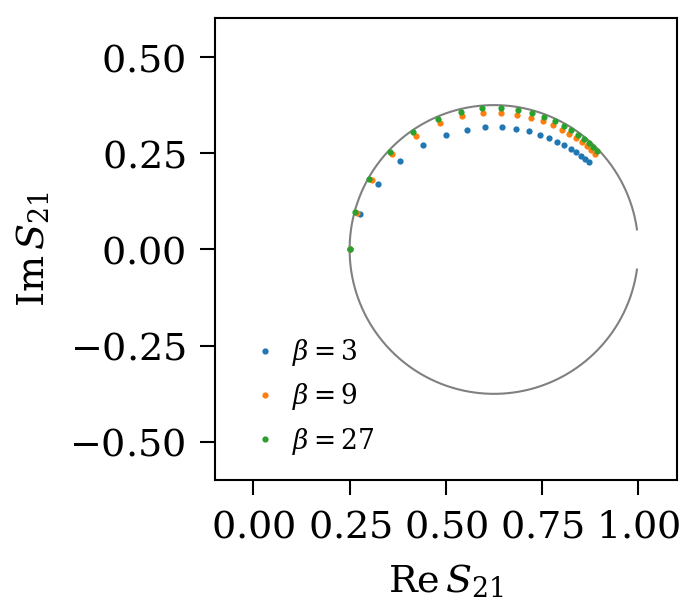

In [56]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.plot(s21.real, s21.imag, color=sweep_color)
#ax.plot(s21_0.real, s21_0.imag, '.', color=resonance_color)
for beta, d_s21 in zip(betas, s21s):
    ax.plot(d_s21.real, d_s21.imag, '.', label='$\\beta = {:.0f}$'.format(beta))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(np.linspace(-0.5, 0.5, 5))
ax.legend(loc='lower left', fontsize='xx-small', handletextpad=0)
ax.set_xlabel('$\\mathrm{{Re}} \\, S_{{21}}$')
ax.set_ylabel('$\\mathrm{{Im}} \\, S_{{21}}$')

if save:
    fig.savefig(save_directory + 's21_response.pdf')